In [28]:
import torch
print(torch.__version__)

1.13.0


In [29]:
 # Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2417, 0.9127, 0.7875, 0.6463],
        [0.1192, 0.1317, 0.9079, 0.4481],
        [0.0022, 0.4382, 0.3800, 0.5075]])
torch.Size([3, 4])


In [31]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


In [32]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  for edge in G.edges():
    edge_list.append(edge)
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index=torch.LongTensor(edge_list).t()
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [33]:
pos_edge_list[:5]

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

In [35]:
G.has_edge(1,0)

True

In [36]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loop should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  #得到图中所有不存在的边，不考虑自环。注意对于逆边问题，我认为在代码编写过程中应该可以不考虑（毕竟是无向图）。
  #不考虑num_neg_sample过大的边界条件
  #我的抽取逻辑是按照non_edges_one_side的索引来抽取边
  non_edges_one_side=list(enumerate(nx.non_edges(G)))
  neg_edge_list_indices=random.sample(range(0,len(non_edges_one_side)),num_neg_samples)  #取样num_neg_samples长度的索引
  for i in neg_edge_list_indices:
    neg_edge_list.append(non_edges_one_side[i][1])
  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
#如果边在图中，就认为不行
print('edge_1'+(" can't" if G.has_edge(edge_1[0],edge_1[1]) else ' can')+' be negative edge')
print('edge_2'+(" can't" if G.has_edge(edge_2[0],edge_2[1]) else ' can')+' be negative edge')
print('edge_3'+(" can't" if G.has_edge(edge_3[0],edge_3[1]) else ' can')+' be negative edge')
print('edge_4'+(" can't" if G.has_edge(edge_4[0],edge_4[1]) else ' can')+' be negative edge')
print('edge_5'+(" can't" if G.has_edge(edge_5[0],edge_5[1]) else ' can')+' be negative edge')

The neg_edge_index tensor has shape torch.Size([2, 78])
edge_1 can't be negative edge
edge_2 can be negative edge
edge_3 can't be negative edge
edge_4 can't be negative edge
edge_5 can be negative edge


In [37]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.13.0


In [38]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [39]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4338e-02]], grad_fn=<EmbeddingBackward0>)
tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4338e-02],
        [ 4.5921e-01,  8.7926e-02,  9.4428e-01, -7.5985e-01,  1.6396e+00,
         -1.9154e+00, -1.8657e+00, -6.7076e-01]], grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


In [40]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb=nn.Embedding(num_node,embedding_dim)
  emb.weight.data=torch.rand(num_node,embedding_dim)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


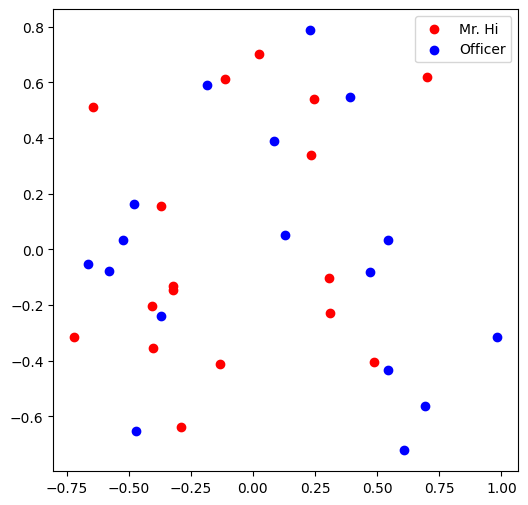

In [41]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':  #node的形式：第一个元素是索引，第二个元素是attributes字典
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [66]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  #accuracy=预测与实际一致的结果数/所有结果数
  #pred tensor和label tensor都是[78*2(156)]大小的tensor
  accu=round(((pred>0.5)==label).sum().item()/(pred.shape[0]),4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (as a sanity check, the loss should decrease during training)

  epochs = 50000
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    optimizer.zero_grad()
    train_node_emb=emb(train_edge)  #[2,156,16]
    dot_product_result=train_node_emb[0].mul(train_node_emb[1])  #点对之间对应位置嵌入相乘，[156,16]
    dot_product_result=torch.sum(dot_product_result,1)  #加起来，构成点对之间向量的点积，[156]
    sigmoid_result=sigmoid(dot_product_result)  #将这个点积结果经过激活函数映射到0,1之间
    loss_result=loss_fn(sigmoid_result,train_label)
    loss_result.backward()
    optimizer.step()
    if i%10==0:  #其实这个应该每一轮都打印一遍的，但是我嫌太大了就十轮打印一遍了
      print(loss_result)
      print(accuracy(sigmoid_result,train_label))
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)  #横着叠

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)  #竖着叠

train(emb, loss_fn, sigmoid, train_label, train_edge)

tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0005,

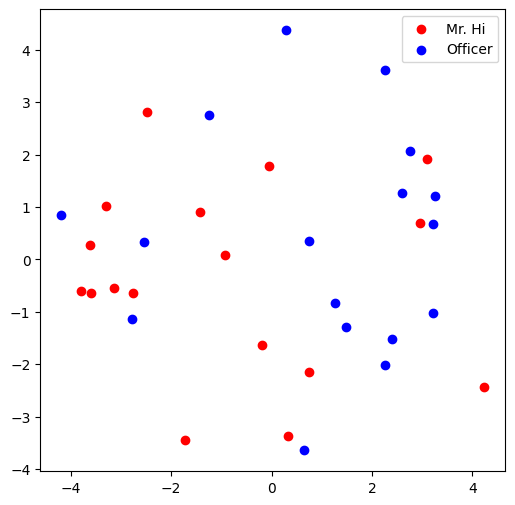

In [67]:
# Visualize the final learned embedding
#如果两种社群分类合理，而且节点嵌入的训练也合理，那么两种社群的嵌入就应该是有所分离的。
#我跑了几次，这是分得比较开的情况之一……
#参考答案上面那个怎么分那么开的？难道这就是脸黑吗？
visualize_emb(emb)